# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

sns.set()

# Reading the Dataset

In [2]:
data = pd.read_csv('data.csv')
data.date = pd.to_datetime(data.date)
data = data.set_index('date')

data_cpy = data

# Splitting the Dataset into train and test sets.

For this dataset, a 80-20 split has been implemeted. i.e. 80% data for training and 20% for testing

- **df** is a dataframe that contains the training data.
- **df_test** is a dataframe that contains the testing data.

In [3]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

# Auto Arima for SPX Market Prices
In this section we try and predict the SPX market prices using only the default **auto_arima** model.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [4]:
model_auto_arima = auto_arima(df.spx)

The summary statistics of the model.

In [5]:
print(model_auto_arima.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4921
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -25971.558
Date:                Sun, 29 Mar 2020   AIC                          51959.116
Time:                        19:46:59   BIC                          52011.125
Sample:                             0   HQIC                         51977.359
                               - 4921                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0320      0.014      2.345      0.019       0.005       0.059
ar.L1          1.7056      0.022     78.654      0.000       1.663       1.748
ar.L2         -0.7789      0.018    -42.393      0.0

### Specify a start date and an end date for predictions.

In [6]:
start_date = "2013-05-13"
end_date = "2018-01-29"

### Use the model to predict the values for the dates defined.

In [7]:
pred = pd.DataFrame(model_auto_arima.predict(n_periods = len(df_test[start_date:end_date])),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

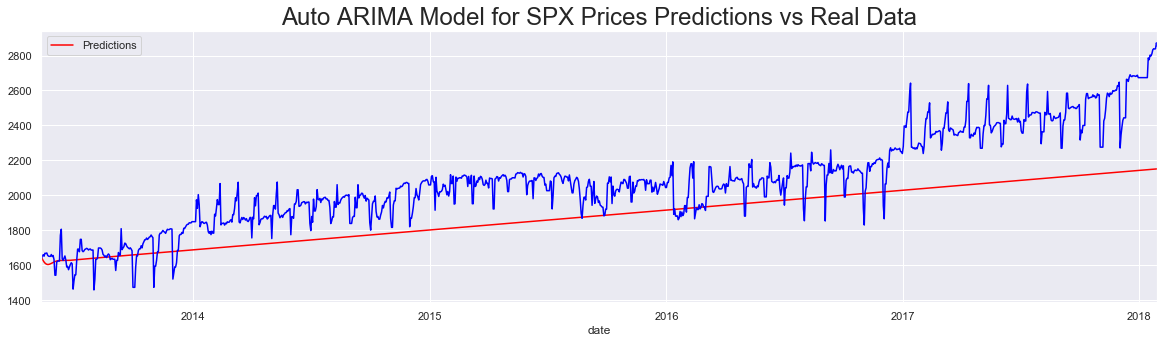

In [8]:
pred.plot(figsize = (20,5), color = "red")
df_test.spx[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMA Model for SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [9]:
mse = mean_squared_error(df_test.spx.values, pred.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 242.3933080381449


# Auto Arima for Normalized SPX Market Prices
In this section we try and predict the Normalized SPX market prices using only the default **auto_arima** model.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [10]:
model_auto_arima_norm = auto_arima(df.spx_norm)

The summary statistics of the model.

In [11]:
print(model_auto_arima_norm.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4921
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -18336.977
Date:                Sun, 29 Mar 2020   AIC                          36689.955
Time:                        19:48:00   BIC                          36741.963
Sample:                             0   HQIC                         36708.198
                               - 4921                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.002      1.405      0.160      -0.001       0.008
ar.L1          1.7175      0.015    112.916      0.000       1.688       1.747
ar.L2         -0.7834      0.015    -51.977      0.0

### Specify a start date and an end date for predictions.

In [12]:
start_date = "2013-05-13"
end_date = "2018-01-29"

### Use the model to predict the values for the dates defined.

In [13]:
pred_norm = pd.DataFrame(model_auto_arima_norm.predict(n_periods = len(df_test[start_date:end_date])),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

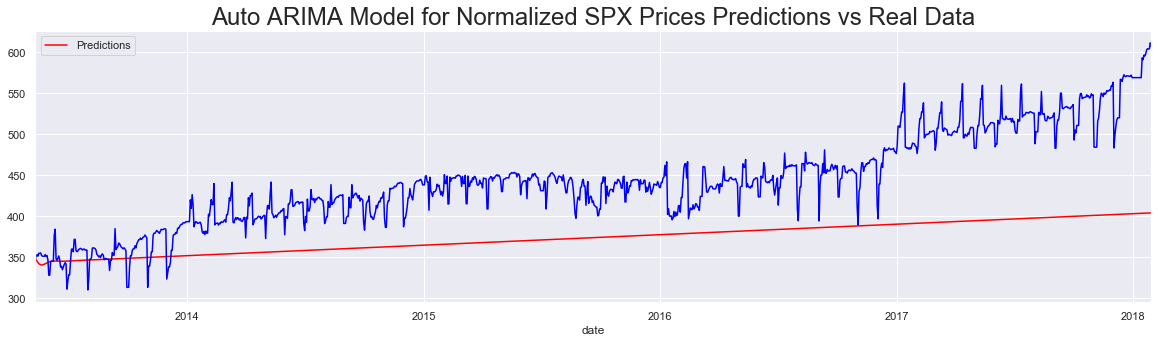

In [14]:
pred_norm.plot(figsize = (20,5), color = "red")
df_test.spx_norm[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMA Model for Normalized SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [15]:
mse = mean_squared_error(df_test.spx_norm.values, pred_norm.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 80.1720638618061


# Auto Arima for SPX Market Returns
In this section we try and predict the SPX market returns using only the default **auto_arima** model.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [16]:
model_auto_arima_ret = auto_arima(df.spx_ret[1:])

The summary statistics of the model.

In [17]:
print(model_auto_arima_ret.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4920
Model:               SARIMAX(2, 0, 4)   Log Likelihood              -14493.549
Date:                Sun, 29 Mar 2020   AIC                          29003.098
Time:                        19:48:59   BIC                          29055.107
Sample:                             0   HQIC                         29021.341
                               - 4920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.001      6.472      0.000       0.006       0.012
ar.L1          1.6881      0.016    104.302      0.000       1.656       1.720
ar.L2         -0.7509      0.016    -47.904      0.0

### Specify a start date and an end date for predictions.

In [18]:
start_date = "2013-05-13"
end_date = "2018-01-29"

### Use the model to predict the values for the dates defined.

In [19]:
pred_ret = pd.DataFrame(model_auto_arima_ret.predict(n_periods = len(df_test[start_date:end_date])),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

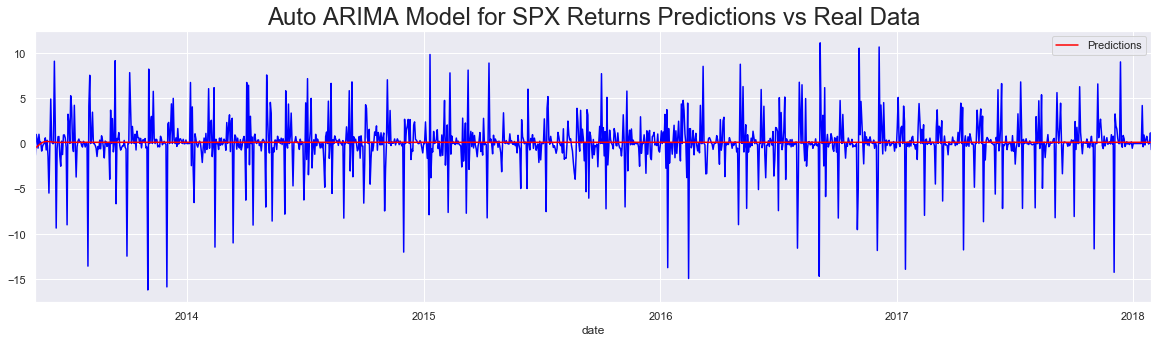

In [20]:
pred_ret.plot(figsize = (20,5), color = "red", zorder=2)
df_test.spx_ret[start_date:end_date].plot(color = "blue", zorder=1)
plt.title("Auto ARIMA Model for SPX Returns Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [21]:
mse = mean_squared_error(df_test.spx_ret.values, pred_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 2.8389066886809275
